# Air BnB EDA & data cleaning

## Notebook setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, power_transform
from scipy.stats import chisquare, kruskal, kurtosis, spearmanr

## Data loading/inspection

In [2]:
data_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 1. Distributions

Investigate each feature separately. This should include summary statistics and plots, each feature should be handled appropriately based on the data type. You should also include a short description of your findings. This is a good time to think about each feature's distribution type, possibly missing and/or extreme values or anything else strange/unexplained/interesting of note.

### 1.1. Numerical features

In [4]:
numerical_features = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [5]:
# Show descriptive statistics for the numerical features: mean, standard deviation etc.
# hint: use Pandas `df.describe()`

data_df[numerical_features].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


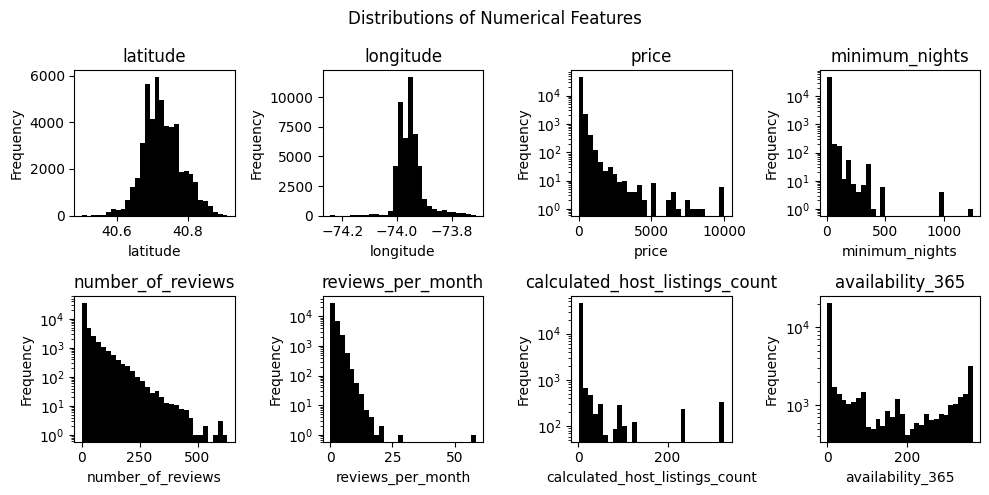

In [6]:
# Show the distributions of the numerical features - use histograms to get an idea of the data's shape. 
# Be sure to label plots & axes and use a scale that makes sense for the data.

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
axes = axes.flatten()

fig.suptitle('Distributions of Numerical Features')

for i, feature in enumerate(numerical_features):

    axes[i].hist(data_df[feature], bins=30, color='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

    if feature not in ['latitude', 'longitude']:
        axes[i].set_yscale('log')

plt.tight_layout()
plt.show()

### 1.2. Categorical features

In [7]:
categorical_features = [
    'neighbourhood_group',
    'room_type',
    'neighbourhood',
    'host_name',
]

In [8]:
# Show number of feature levels and level counts for each categorical feature
# hint: use Pandas `df.nunique()` and/or `df.value_counts()`

data_df[categorical_features].nunique()

neighbourhood_group        5
room_type                  3
neighbourhood            221
host_name              11452
dtype: int64

In [9]:
for feature in ['neighbourhood_group', 'room_type']:
    print(f"Feature: {feature}")
    print(data_df[feature].value_counts())
    print("\n")

Feature: neighbourhood_group
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


Feature: room_type
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64




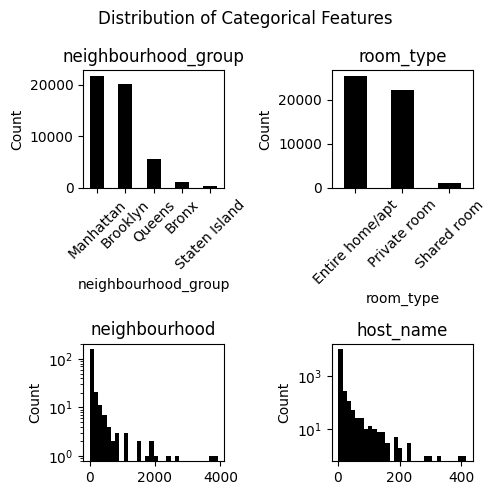

In [10]:
# Show the Distribution for each categorical feature - how many observations fall into each category.
# Matplotlib or Seaborn bar plots are a good options here.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
axes = axes.flatten()
fig.suptitle('Distribution of Categorical Features')

for i, feature in enumerate(['neighbourhood_group', 'room_type']):
    data_df[feature].value_counts().plot(kind='bar', ax=axes[i], color='black')
    axes[i].set_title(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for i, feature in enumerate(['neighbourhood', 'host_name']):
    axes[i + 2].hist(data_df[feature].value_counts().values, bins=30, color='black')
    axes[i + 2].set_title(feature)
    axes[i + 2].set_ylabel('Count')
    axes[i + 2].set_yscale('log')

plt.tight_layout()
plt.show()

## 2. Interactions

Investigate interactions between features. This will give you information about which features have strong relationships and therefore will be useful for modeling. Include a plot and a quantification of the strength of relationship between each pair of features. Quantification can be done using a correlation coefficient or statistical test. Again, each pair of features should be handled correctly based on the data types.

### 2.1. Nominal vs nominal features

In [11]:
# Quantify the association between nominal features using the Chi-squared test for contingency tables of count data
# hint: see `scipy.stats.chisquare` - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

groups = data_df.groupby(['neighbourhood_group', 'room_type']).size()
result = chisquare(list(groups))
print(f"Chi-squared p-value: {result.pvalue:.3f}")

Chi-squared p-value: 0.000


<Axes: xlabel='neighbourhood_group', ylabel='Listing Count'>

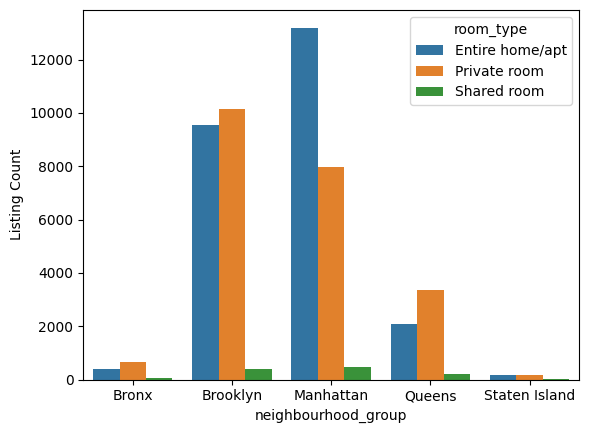

In [ ]:
# Plot the counts in each category with a stratified bar plot. Matplotlib or Seaborn are a good options here.

groups_df = groups.reset_index()
groups_df.rename(columns={0: 'Listing Count'}, inplace=True)
sns.barplot(data=groups_df, x='neighbourhood_group', hue='room_type', y='Listing Count')

### 2.2. Nominal vs numerical features

In [13]:
# Use Kruskal-Wallis H-tests for equality of medians with a nominal feature as the independent variable and one 
# of the numerical features as the dependent variable. hint: see `scipy.stats.kruskal`
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html.
# 
# Question: why am I suggesting the H-test here, rather than ANOVA?

nominal_features = ['neighbourhood_group', 'room_type']

numerical_features = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

kruskal_results = {
    'Independent variable': [],
    'Dependent variable': [],
    'H-test p-value': [],
}

for nominal_feature in nominal_features:
    for numerical_feature in numerical_features:
        groups = data_df.groupby(nominal_feature)[numerical_feature].apply(list)
        result = kruskal(*groups)
        kruskal_results['Independent variable'].append(nominal_feature)
        kruskal_results['Dependent variable'].append(numerical_feature)
        kruskal_results['H-test p-value'].append(result.pvalue)

kruskal_df = pd.DataFrame(kruskal_results)
kruskal_df.sort_values(by='H-test p-value', ascending=True, inplace=True)
print(kruskal_df)

   Independent variable              Dependent variable  H-test p-value
0   neighbourhood_group                        latitude    0.000000e+00
1   neighbourhood_group                       longitude    0.000000e+00
2   neighbourhood_group                           price    0.000000e+00
9             room_type                       longitude    0.000000e+00
14            room_type  calculated_host_listings_count    0.000000e+00
11            room_type                  minimum_nights    0.000000e+00
10            room_type                           price    0.000000e+00
7   neighbourhood_group                availability_365   2.602079e-214
3   neighbourhood_group                  minimum_nights   1.880339e-170
6   neighbourhood_group  calculated_host_listings_count    8.259651e-82
4   neighbourhood_group               number_of_reviews    4.849946e-65
15            room_type                availability_365    1.062234e-34
12            room_type               number_of_reviews    2.614

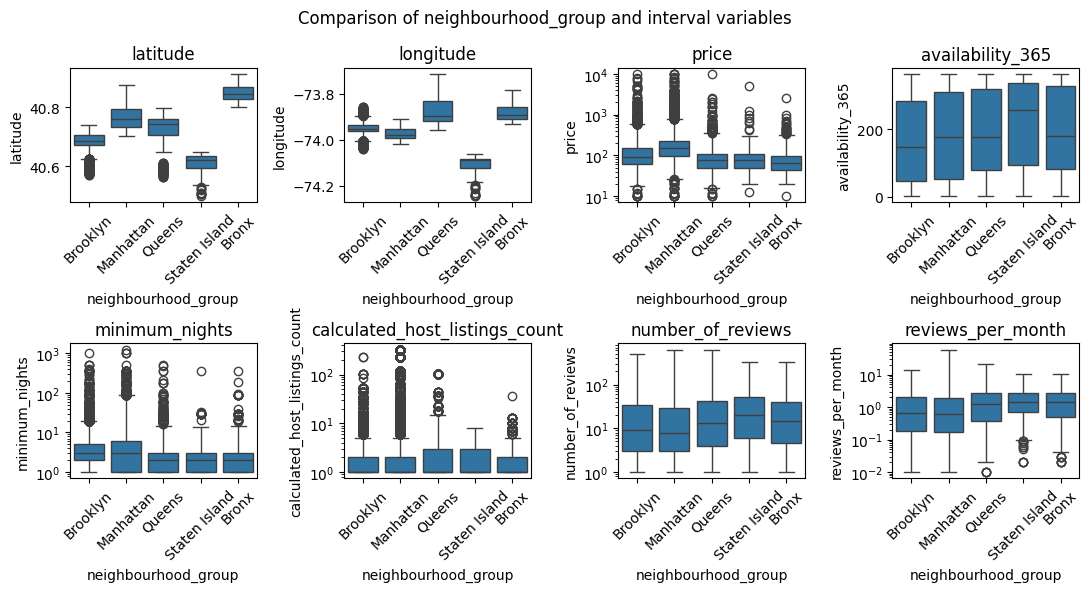

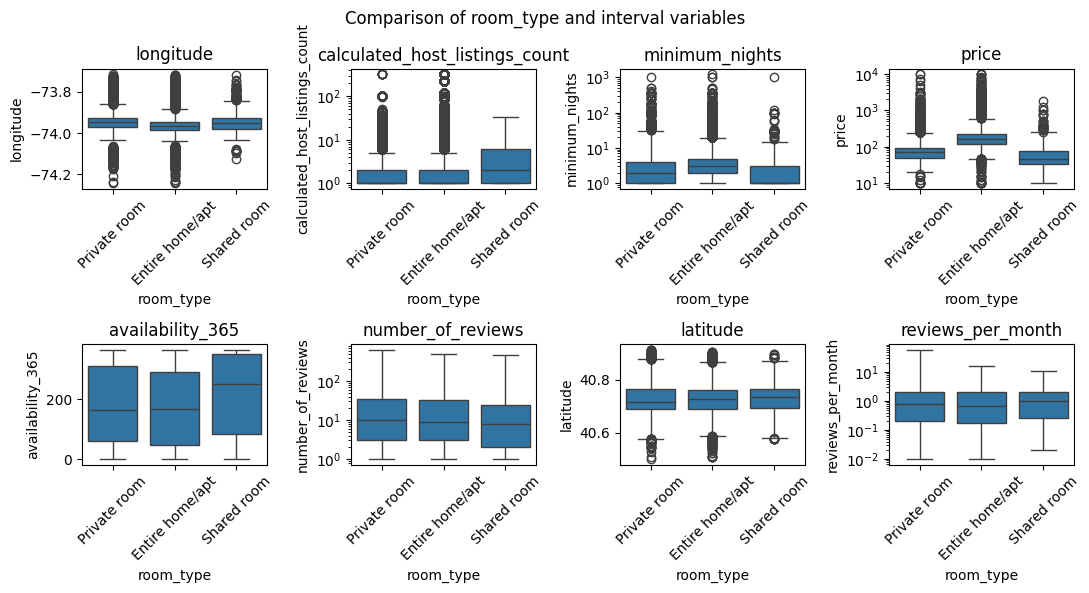

In [14]:
# Plot stratified boxplots where a nominal feature is the x-axis and numerical feature is y-axis.
# Draw one plot for each nominal feature. Seaborn is a great option.

for nominal_feature in nominal_features:

    htest_results_subset_df = kruskal_df[kruskal_df['Independent variable'] == nominal_feature]
    features = htest_results_subset_df['Dependent variable']

    fig, axs = plt.subplots(2, 4, figsize=(11, 6))
    axs = axs.flatten()

    fig.suptitle(f'Comparison of {nominal_feature} and interval variables')

    for i, feature in enumerate(features):

        plot_df = data_df[data_df[feature] != 0]

        if kurtosis(plot_df[feature].dropna()) > 10:
            log_scale = True

        else:
            log_scale = False

        sns.boxplot(x=nominal_feature, y=feature, data=plot_df, log_scale=log_scale, ax=axs[i])
        axs[i].set_title(feature)
        axs[i].set_xlabel(nominal_feature)
        axs[i].set_ylabel(feature)
        axs[i].tick_params(axis='x', labelrotation=45)

    plt.tight_layout()
    plt.show()




### 2.3. Numerical vs numerical features

In [15]:
# Quantify the strength of correlation between pairs of numerical features using Spearman or Kendall
# correlation coefficient. SciPy.stats has pairwise implementations for both: 
# spearmanr https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
# kendalltau https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html
# Pandas `df.corr()`is another option to calculate a full cross-correlation matrix for a dataframe
# in one call - but be careful with the defaults, they are not appropriate for this data!.

feature_pairs = list(set(tuple(sorted((x, y))) for x in numerical_features for y in numerical_features if x != y))

correlations = {
    'Feature 1': [],
    'Feature 2': [],
    'Spearman correlation': [],
    'Spearman p-value': []
}


# Loop on the feature pairs to calculate the corelation coefficients between each
for feature_pair in feature_pairs:

    # Exclude self pairs
    if feature_pair[0] != feature_pair[1]:

        # Get data for this feature pair
        feature_pair_data = data_df[[*feature_pair]].copy()

        # Replace any infinite values with nan and drop
        feature_pair_data.replace([np.inf, -np.inf], np.nan, inplace=True)
        feature_pair_data.dropna(inplace=True)

        # Get Spearman correlation coefficients and p-values
        src = spearmanr(feature_pair_data.iloc[:,0], feature_pair_data.iloc[:,1])

        # Collect the results
        correlations['Feature 1'].append(feature_pair[0])
        correlations['Feature 2'].append(feature_pair[1])
        correlations['Spearman correlation'].append(src.statistic)
        correlations['Spearman p-value'].append(src.pvalue)

# Sort by Spearman rank and inspect
correlations_df = pd.DataFrame.from_dict(correlations)
correlations_df.sort_values('Spearman correlation', inplace=True, ascending=False)
correlations_df.reset_index(inplace=True, drop=True)
correlations_df.head(len(correlations_df))

,Feature 1,Feature 2,Spearman correlation,Spearman p-value
0,number_of_reviews,reviews_per_month,0.706208,0.000000e+00
1,availability_365,calculated_host_listings_count,0.406606,0.000000e+00
2,availability_365,reviews_per_month,0.392126,0.000000e+00
3,availability_365,number_of_reviews,0.236664,0.000000e+00
4,calculated_host_listings_count,reviews_per_month,0.146484,3.120195e-185
5,latitude,price,0.136172,5.092776e-201
6,longitude,reviews_per_month,0.119089,1.142853e-122
7,minimum_nights,price,0.101289,1.158209e-111
8,availability_365,price,0.086088,4.413697e-81
9,longitude,number_of_reviews,0.079847,5.604696e-70


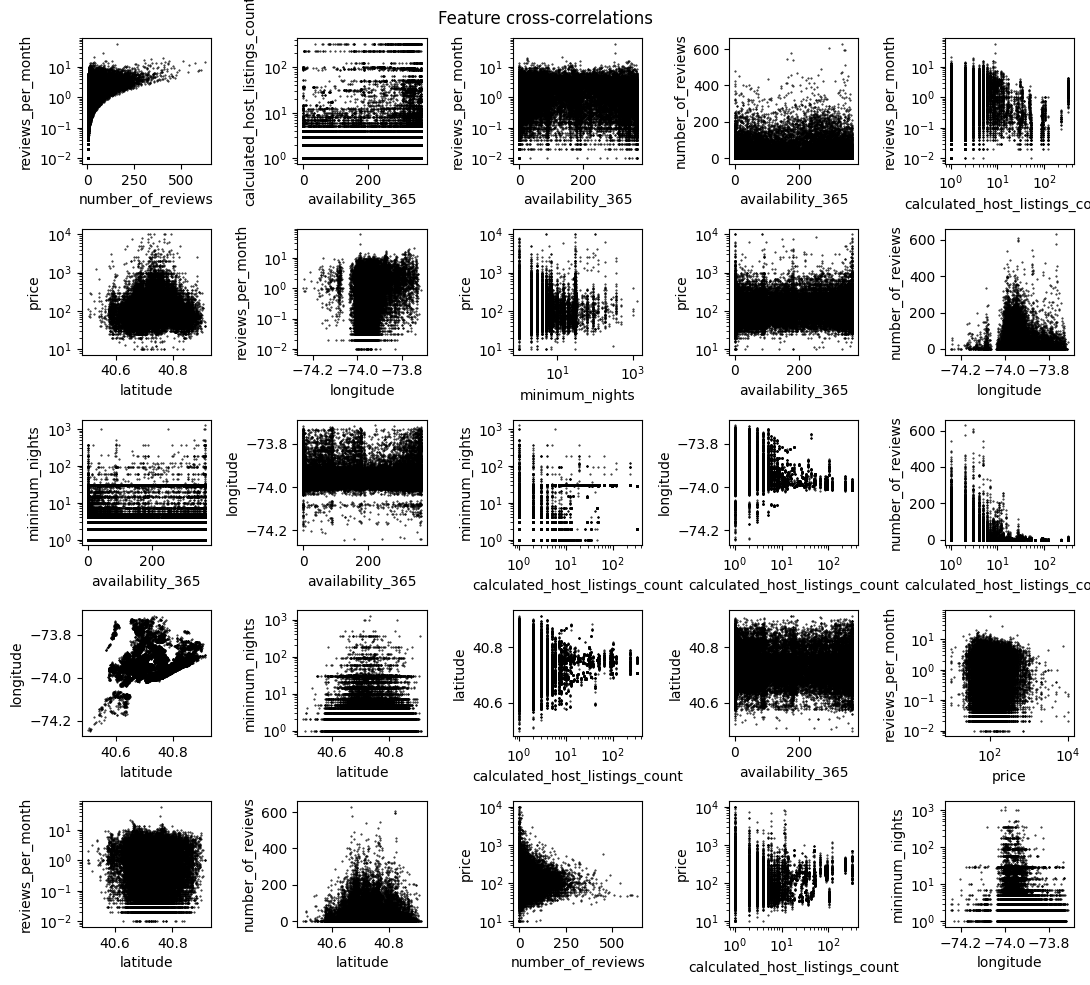

In [16]:
# Plot relationships between numerical features using a scatter plot with Matplotlib. Be sure to label axes 
# and/or plot and pick appropriate scales. Adding a best fit line can be nice, but is not super
# important for this data. Question: why not? Related: why am I suggesting non-parametric rank
# based correlation coefficients above?

fig, axs = plt.subplots(5, 5, figsize=(11, 10))
fig.suptitle('Feature cross-correlations')

for ax, (_, row) in zip(axs.flat, correlations_df.iterrows()):

    ax.scatter(data_df[row['Feature 1']], data_df[row['Feature 2']], s=0.2, color='black')
    ax.set_xlabel(row['Feature 1'])
    ax.set_ylabel(row['Feature 2'])

    if kurtosis(data_df[row['Feature 1']].dropna()) > 40:
        ax.set_xscale('log')

    if kurtosis(data_df[row['Feature 2']].dropna()) > 40:
        ax.set_yscale('log')

fig.tight_layout()

## 3. Data cleaning

### 3.1. Feature selection

Decide what features to include in (or exclude from) you analysis. Base this decision on the type and quality of information contained in each feature. Will it be useful for modeling? Example: the listing id number is not needed. There are no features in this dataset which should be removed based on their correlation (or lack thereof) with other features alone.

In [17]:
# Select desired features and/or drop unwanted features from your dataframe

feature_drops = ['id', 'name', 'host_id', 'host_name', 'last_review', 'neighbourhood']
data_df.drop(columns=feature_drops, inplace=True, errors='ignore')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


### 3.2. Missing values

The only relevant feature in the dataset that contains obviously missing data is `reviews_per_month`. Think about why this column might have so much missing data and where it came from. Then come up with a strategy to handle the missing data appropriately by either excluding it or filling it in with a meaningful value.

In [18]:
# Implement your strategy for handling missing values in the `reviews_per_month` feature.

# Fill missing reviews_per_month with 0
data_df['reviews_per_month'] = data_df['reviews_per_month'].replace(np.nan, 0)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


### 3.3. Extreme values

Remove or replace any extreme values for which you think action is warranted. Note: it is not required for you to take any action based solely on the identification of an observation or observations as 'statistical' outliers. Examples: the `minimum_nights` column contains 999 values for several listings, these could be removed or filled based on the assumption that they are placeholders or errors. However, the `price` column has several very expensive listings, but on inspection they do seem to be real data (one is a 70 foot yacht parked on Manhattan!). These could be excluded or clipped, but a justification should be made in terms of the goal of the analysis.

In [19]:
# Handle extreme values in the dataset. Remove or replace any extreme values for which you think action is warranted.

# Remove $0 listings
data_df = data_df[data_df['price'] > 0]

# Remove apparent placeholder values in minimum_nights
data_df = data_df[data_df['minimum_nights'] < 999]

## 4. Feature engineering

### 4.1. Feature encoding

The dataset contains two nominal features which need to be encoded to numbers: `neighbourhood_group` and `room_type`. Nominal features should be one-hot encoded. See [`sklearn.preprocessing.OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [20]:
# Apply one-hot encoding to the nominal features `neighbourhood_group` and `room_type`.

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data_df[['neighbourhood_group', 'room_type']])

features = encoder.get_feature_names_out(['neighbourhood_group', 'room_type'])
encoded_features = pd.DataFrame(encoded_features, columns=features)
data_df = pd.concat([data_df.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)
data_df.drop(columns=['neighbourhood_group', 'room_type'], inplace=True, errors='ignore')
data_df.head().transpose()

,0,1,2,3,4
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.94190,-73.95976,-73.94399
price,149.00000,225.00000,150.00000,89.00000,80.00000
minimum_nights,1.00000,1.00000,3.00000,1.00000,10.00000
number_of_reviews,9.00000,45.00000,0.00000,270.00000,9.00000
reviews_per_month,0.21000,0.38000,0.00000,4.64000,0.10000
calculated_host_listings_count,6.00000,2.00000,1.00000,1.00000,1.00000
availability_365,365.00000,355.00000,365.00000,194.00000,0.00000
neighbourhood_group_Bronx,0.00000,0.00000,0.00000,0.00000,0.00000
neighbourhood_group_Brooklyn,1.00000,0.00000,0.00000,1.00000,0.00000


### 4.2. Feature scaling

Model performance can often be improved by transforming and/or scaling the features and labels, but this depends on the model type. The features and labels in this dataset are not normally distributed, so a Box-Cox transformation will improve the performance of many common model types (including linear and logistic regression). See [`sklearn.preprocessing.PowerTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html).

In [21]:
# Apply sklearn's power transformer to the numerical features to improve their distribution.

data_df = pd.DataFrame(power_transform(data_df[numerical_features], method='yeo-johnson'), columns=numerical_features)
data_df.head().transpose()

,0,1,2,3,4
latitude,-4.107825e-15,1.249001e-15,3.996803e-15,-2.192690e-15,3.469447e-15
longitude,-4.335771e-01,-6.885973e-01,2.395155e-01,-1.535197e-01,1.937401e-01
price,4.784296e-01,1.017766e+00,4.876254e-01,-2.768321e-01,-4.451126e-01
minimum_nights,-1.288218e+00,-1.288218e+00,1.737943e-01,-1.288218e+00,1.273668e+00
number_of_reviews,3.048435e-01,1.166071e+00,-1.382663e+00,1.967181e+00,3.048435e-01
reviews_per_month,-5.360147e-01,-1.825368e-01,-1.145267e+00,1.641353e+00,-8.251541e-01
calculated_host_listings_count,1.807012e+00,7.584759e-01,-6.821601e-01,-6.821601e-01,-6.821601e-01
availability_365,1.248036e+00,1.233559e+00,1.248036e+00,9.271416e-01,-1.189624e+00


### 4.3. Other

The sky is the limit. It is common and often very effective to make new features by combining features already present, or bringing in external data. For example: what if you normalized the `price` feature by the mean residential property value in dollars per square foot for the 5 boroughs? You also could probably calculate an estimated listing age from the total reviews and the reviews per month. Be creative and do experiments. I was able to improve linear regression performance on price from under 50% of variance explained to almost 60% by adding polynomial combinations of the features to the data (see detailed solution notebooks).
